## Dask

* Dask provides multi-core execution on larger-than-memory datasets.

* Tutorial: https://github.com/dask/dask-tutorial (korzystamy z tego)


Dask służy do:
   * obsługi wielowymiarowych zbiorów danych niemieszczących się w pamięci
   * łatwego tworzenia skryptów o bardziej skomplikowanej strukturze zamiast korzystania z bibliotek takich jak threading or multiprocessing

### Stosowanie Daska do wykonywania fragmentów skryptu niezależnie

In [1]:
from time import sleep

def fun1(a, b):
    sleep(1)
    return a+b

def fun2(a,b):
    sleep(1)
    return(a**b)

In [2]:
%%time

x = fun1(1,2)
y = fun2(1,2)
z = fun1(1,2)

CPU times: user 813 µs, sys: 1.72 ms, total: 2.53 ms
Wall time: 3.01 s


In [3]:
from dask import delayed

In [4]:
%%time

x = delayed(fun1)(1,2)
y = delayed(fun2)(1,2)
z = delayed(fun1)(x,y)

CPU times: user 795 µs, sys: 608 µs, total: 1.4 ms
Wall time: 884 µs


In [5]:
%%time

z.compute()

CPU times: user 5.25 ms, sys: 3.25 ms, total: 8.5 ms
Wall time: 2.01 s


4

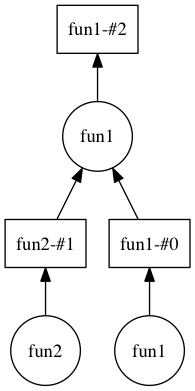

In [6]:
z.visualize()

### Loops

In [7]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
%%time
# Sequential code

results = []
for x in data:
    y = fun1(x, 1)
    results.append(y)
    
total = sum(results)

CPU times: user 6.9 ms, sys: 3.41 ms, total: 10.3 ms
Wall time: 8.02 s


#### A teraz spróbujcie to zrobić z wykorzystaniem Daska :)

### Working with dataframes

In [ ]:
# preparation of data
import pandas as pd
import numpy as np

for i in np.arange(1,5,1):
    pd.DataFrame(np.random.random(100).reshape(5,20)).to_csv('file_{}.csv'.format(str(i)))

In [ ]:
import dask.dataframe as dd
df = dd.read_csv('file_*.csv')
# load and count number of rows
df.head()

In [ ]:
len(df)

In [ ]:
%time
filenames = ['file_1.csv', 'file_2.csv', 'file_3.csv', 'file_4.csv']

maxes = []
for fn in filenames:
    p_df = pd.read_csv(fn)
    maxes.append(p_df['2'].max())

final_max = max(maxes)
final_max

In [ ]:
%time 
df = dd.read_csv('file_*.csv')
final_max = df['2'].max().compute()
final_max